In [1]:
# Data wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

## DATA WRANGLING

In [2]:
# Load cleaned datasets
movie_metadata = pd.read_csv('data_cleaned/movie_cleaned.csv', lineterminator='\n')
character_metadata = pd.read_csv('data_cleaned/character_cleaned.csv')

for i in [movie_metadata, character_metadata]:
    i.columns = i.columns.str.replace(' ', '_')
    i.fillna(0, inplace=True)

C:\Users\kavus\AppData\Local\Temp\ipykernel_18180\3977295388.py:2: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_metadata = pd.read_csv('data_cleaned/movie_cleaned.csv', lineterminator='\n')


In [3]:
print("MOVIE DATA COLUMNS:\n",movie_metadata.columns,"\n\n","CHARACTER DATA COLUMNS:\n",character_metadata.columns)

MOVIE DATA COLUMNS:
 Index(['Unnamed:_0', 'Wikipedia_Movie_ID', 'Freebase_Movie_ID', 'Movie_name',
       'Movie_release_date', 'Movie_runtime', 'Movie_languages',
       'Movie_countries', 'Movie_genres', 'TMDB_id', 'TMDB_original_language',
       'TMDB_original_title', 'TMDB_overview', 'TMDB_popularity',
       'TMDB_release_date', 'TMDB_title', 'TMDB_vote_average',
       'TMDB_vote_count', 'TMDB_runtime', 'TMDB_budget', 'TMDB_IMDB_id',
       'TMDB_genres', 'Movie_box_office_revenue', 'Movie_release_year',
       'log_Movie_box_office_revenue', 'log_Movie_release_year'],
      dtype='object') 

 CHARACTER DATA COLUMNS:
 Index(['Unnamed:_0', 'Wikipedia_Movie_ID', 'Freebase_Movie_ID',
       'Movie_release_date', 'Character_name', 'Actor_DOB', 'Actor_gender',
       'Actor_height', 'Actor_ethnicity', 'Actor_name',
       'Actor_age_at_movie_release', 'Freebase_character_map',
       'Freebase_character_ID', 'Freebase_actor_ID', 'Movie_release_year',
       'Actor_birth_year', 'log_M

## REVENUE REGRESSION

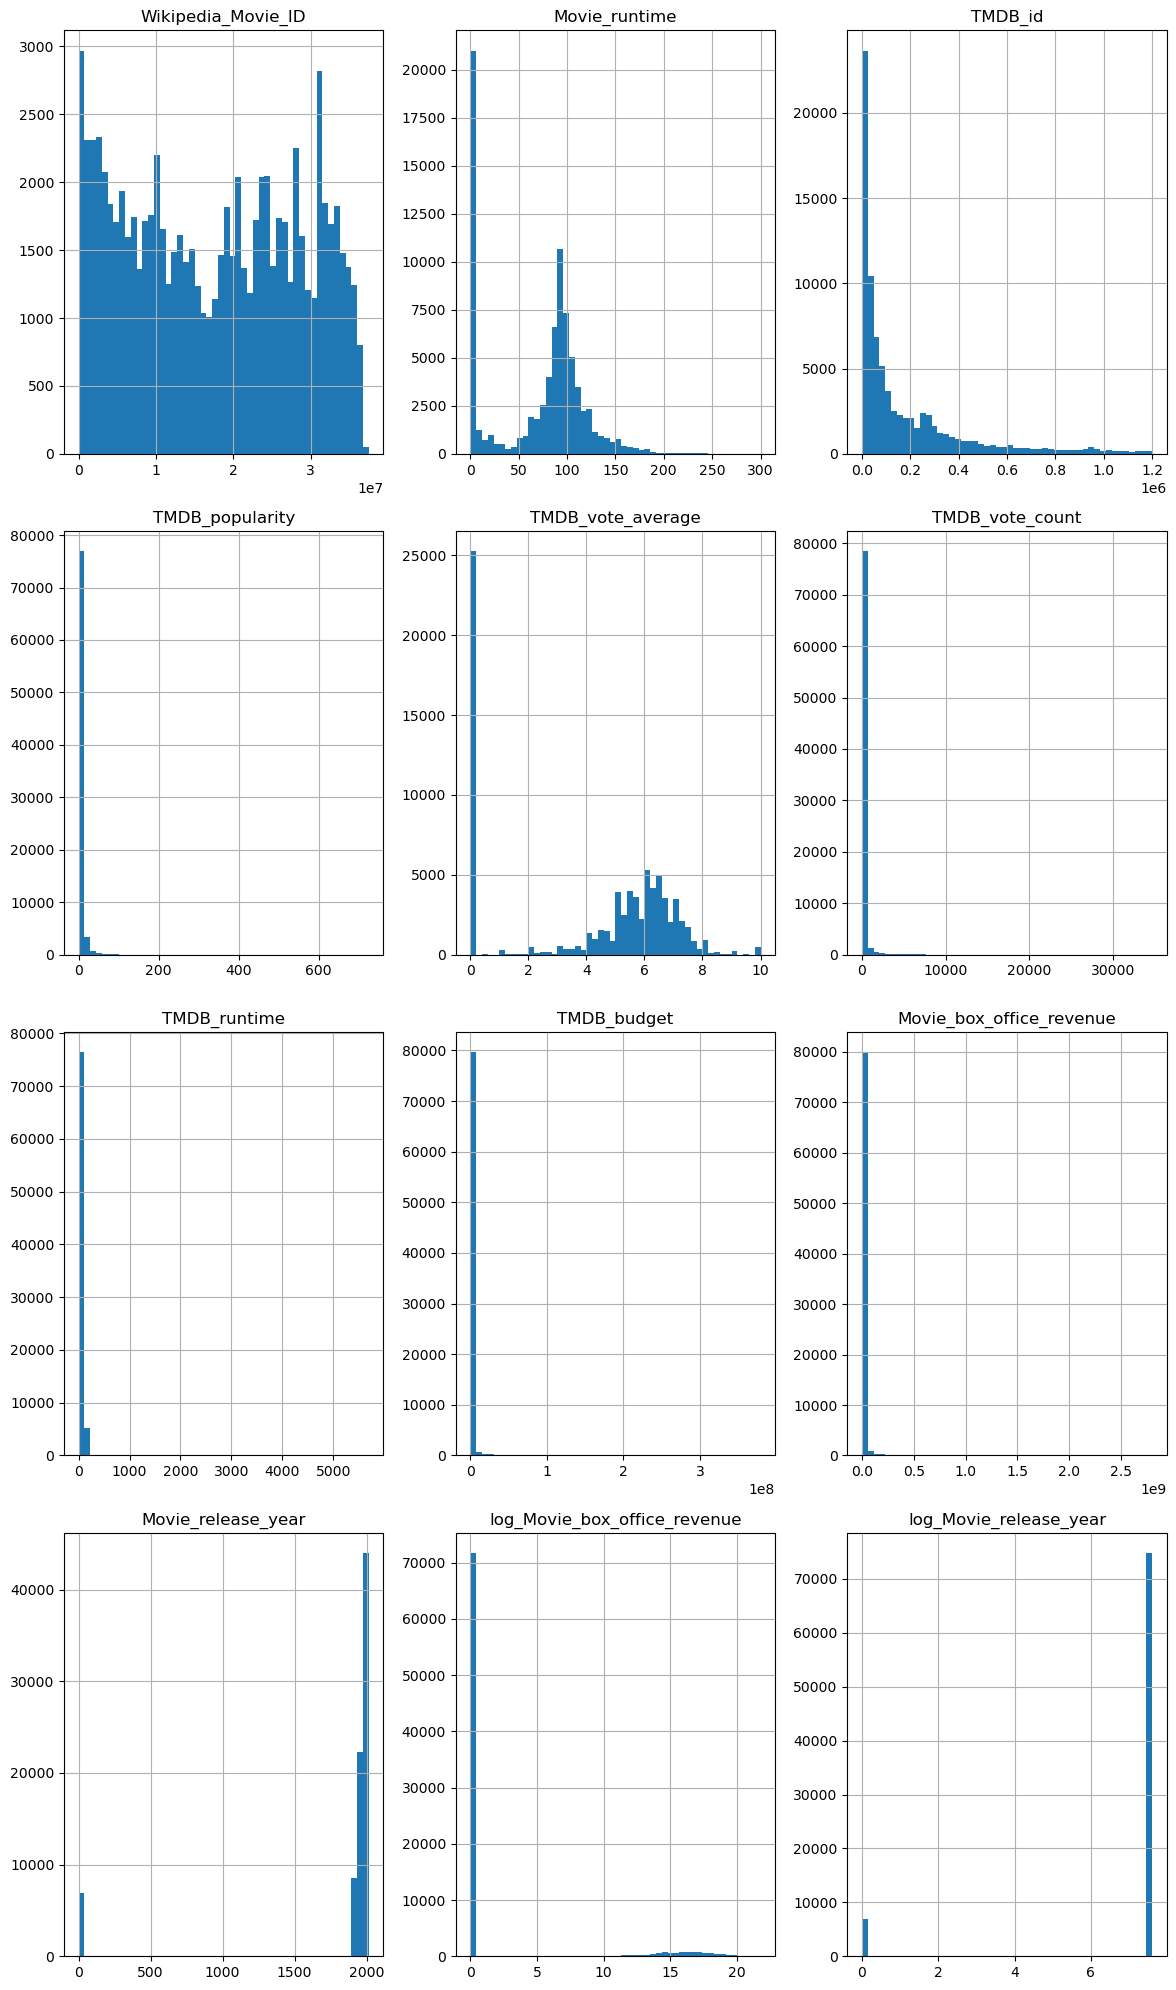

In [4]:
# Select only numeric columns
numeric_columns = movie_metadata.select_dtypes(include=['number']).columns

# Calculate the number of rows and columns dynamically
num_cols = 3
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols -1

# Increase figure size and adjust layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 5 * num_rows))

# Plot histograms for each numeric column
for i, col in enumerate(numeric_columns[1:]):
    row, col_index = divmod(i, num_cols)
    movie_metadata[col].hist(ax=axes[row, col_index], bins=50)
    axes[row, col_index].set_title(col)



# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

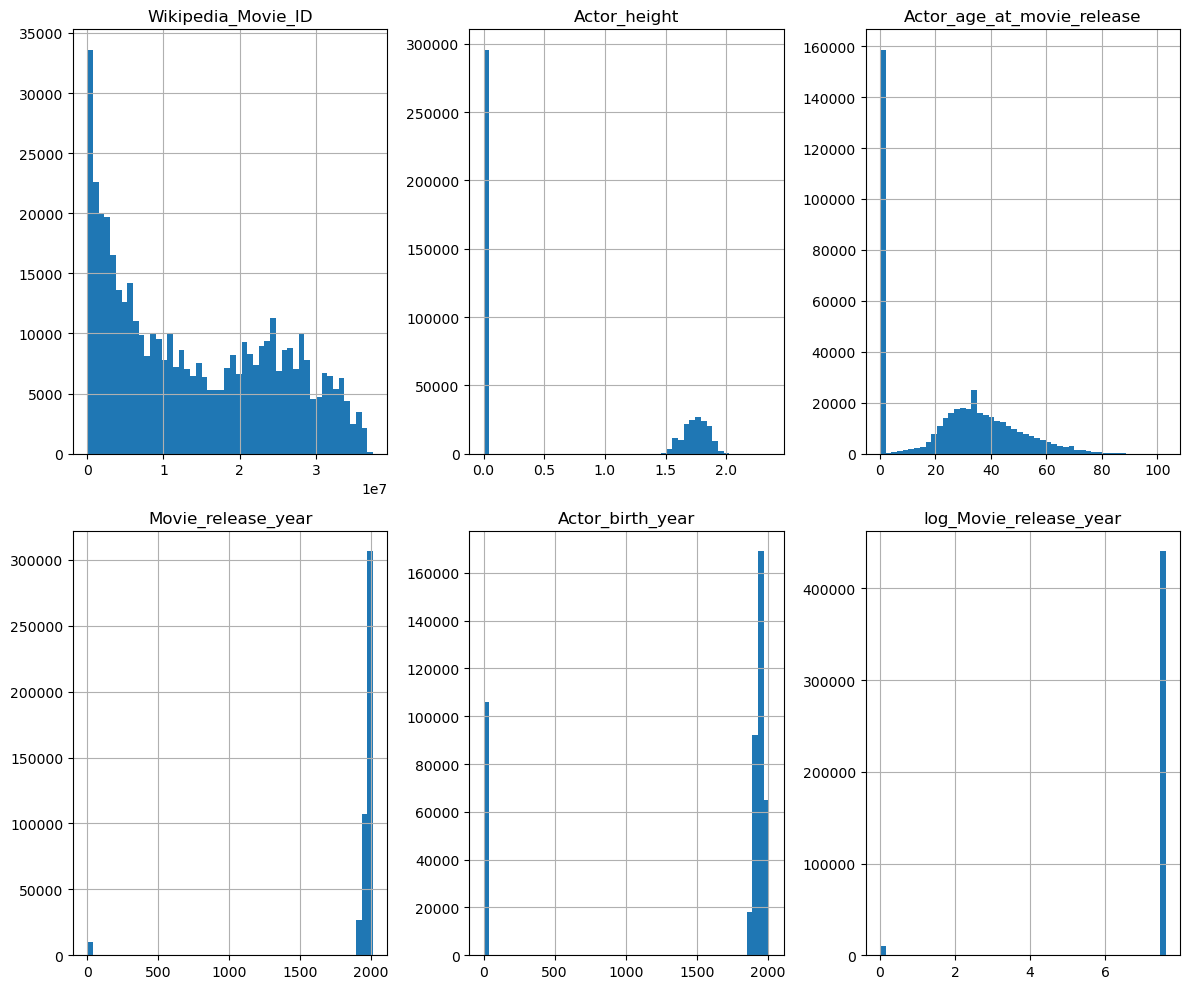

In [5]:
# Select only numeric columns
numeric_columns = character_metadata.select_dtypes(include=['number']).columns

# Calculate the number of rows and columns dynamically
num_cols = 3
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols -1

# Increase figure size and adjust layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 5 * num_rows))

# Plot histograms for each numeric column
for i, col in enumerate(numeric_columns[1:]):
    row, col_index = divmod(i, num_cols)
    character_metadata[col].hist(ax=axes[row, col_index], bins=50)
    axes[row, col_index].set_title(col)



# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [6]:
print(character_metadata.shape, movie_metadata.shape)

(450669, 17) (81741, 26)


In [7]:
movie_reg_data = movie_metadata[['Movie_release_date', 'Movie_runtime', 'Movie_languages',
       'Movie_countries', 'Movie_genres', 'Movie_release_year',
       'log_Movie_box_office_revenue']]

In [9]:
model1_movie = smf.ols(formula='log_Movie_box_office_revenue ~ Movie_release_date + Movie_runtime + \
                                C(Movie_languages) + C(Movie_countries) + C(Movie_genres) + \
                                Movie_release_year', 
                       data=movie_reg_data)
# Fit the model
np.random.seed(2)
res = model1_movie.fit()

# Print the summary output provided by the library
print(res.summary())

MemoryError: Unable to allocate 29.3 GiB for an array with shape (81741, 48144) and data type float64